# Kaggle Bike Sharing Demand
[http://www.kaggle.com/c/bike-sharing-demand](http://www.kaggle.com/c/bike-sharing-demand)

- Bike_Sharing_Demand.csv (10,886 * 12)
   - <font color = 'blue'>datetime : Date + Timestamp</font>
   - season : 1(봄), 2(여름), 3(가을), 4(겨울)
   - holiday : 0(휴일이 아닌 날), 1(토요일, 일요일을 제외한 공휴일)
   - workingday : 0(주말 및 휴일), 1(토요일, 일요일 및 휴일이 아닌 주중)
   - weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)
   - temp : 온도(섭씨)
   - atemp : 체감온도(섭씨)
   - humidity : 습도
   - windspeed : 풍속
   - casual : 사전 등록되지 않은 사용자 대여 횟수
   - registered : 사전 등록된 사용자 대여 횟수
   - <font color = 'red'>count : 총 대여 횟수 -> 'y'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Data Load
* 'Bike_Sharing_Demand.csv' from Github

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
DF.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# II. Data Preprocessing

> ## 1) 'object' -> 'datetime64'

In [ ]:
DF['datetime'] = pd.to_datetime(DF['datetime'])

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


> ## 2) 'year', 'month', 'day', 'hour', 'weekday' 추출

In [ ]:
DF['year'] = DF['datetime'].dt.year
DF['month'] = DF['datetime'].dt.month
DF['day'] = DF['datetime'].dt.day
DF['hour'] = DF['datetime'].dt.hour
DF['weekday'] = DF['datetime'].dt.weekday

In [ ]:
DF.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 3) Drop Columns

- 'datetime'

In [ ]:
DF.drop(columns = 'datetime', axis = 1, inplace = True)

In [ ]:
DF.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 4) 분석용 DataFrame 백업

In [ ]:
DF0 = DF.copy()

DF0.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 5) 시각화 레이블 변환

In [ ]:
DF['season'] = DF['season'].map({1: 'Spring', 
                                 2: 'Summer', 
                                 3: 'Fall', 
                                 4: 'Winter'})

DF['weather'] = DF['weather'].map({1: 'Clear', 
                                   2: 'Mist, Few clouds', 
                                   3: 'Light Snow, Rain, Thunder', 
                                   4: 'Heavy Snow, Rain, Thunder'})

DF['holiday'] = DF['holiday'].map({0: 'WorkingDay', 
                                   1: 'Holiday'})

DF['workingday'] = DF['workingday'].map({0: 'Holiday', 
                                         1: 'WorkingDay'})

DF['weekday'] = DF['weekday'].map({0: 'Monday', 
                                   1: 'Tuesday', 
                                   2: 'Wednesday', 
                                   3: 'Thursday',
                                   4: 'Friday',
                                   5: 'Saturday',
                                   6: 'Sunday'})

In [ ]:
DF.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,Spring,WorkingDay,Holiday,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,Spring,WorkingDay,Holiday,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,Spring,WorkingDay,Holiday,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday


# III. 탐색적데이터분석(EDA)

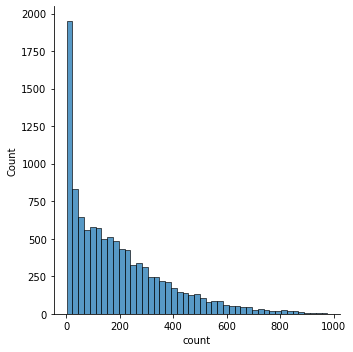

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x = 'count',
             data = DF)
plt.show()

In [ ]:
DF['count'].mean()

191.57413191254824

상관계수 확인 corr()

In [ ]:
DF.corr()

,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.166862,0.019826,0.400601
year,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,-0.004932,0.001800,-0.004234
month,0.257589,0.264173,0.204537,-0.150192,0.092722,0.169451,0.166862,-0.004932,1.000000,0.001974,-0.006818
day,0.015551,0.011866,-0.011335,0.036157,0.014109,0.019111,0.019826,0.001800,0.001974,1.000000,0.001132


Heapmap 으로 visualization

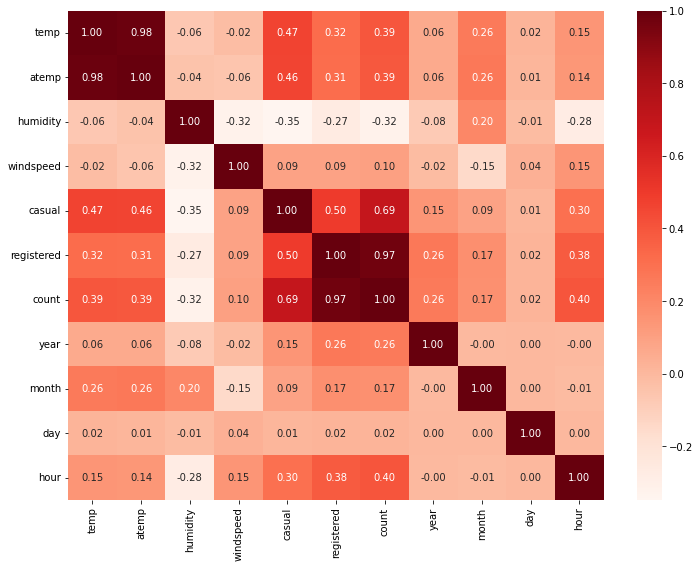

In [ ]:
plt.figure(figsize = (12, 9))
sns.heatmap(DF.corr(),
            annot = True,
            cmap = 'Reds',
            fmt = '.2f')
plt.show()

In [ ]:
DF.corr().loc['temp':, 'count'].abs().sort_values(ascending = False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
month         0.166862
windspeed     0.101369
day           0.019826
Name: count, dtype: float64

In [ ]:
DF_3 = DF.loc[:, ['count','registered','casual','hour','temp','atemp','humidity']].copy()
DF_3

,count,registered,casual,hour,temp,atemp,humidity
0,16,13,3,0,9.84,14.395,81
1,40,32,8,1,9.02,13.635,80
2,32,27,5,2,9.02,13.635,80
3,13,10,3,3,9.84,14.395,75
4,1,1,0,4,9.84,14.395,75
...,...,...,...,...,...,...,...
10881,336,329,7,19,15.58,19.695,50
10882,241,231,10,20,14.76,17.425,57
10883,168,164,4,21,13.94,15.910,61
10884,129,117,12,22,13.94,17.425,61


In [ ]:
DF_3.columns[0]

'count'

count와 3위까지의 변수 visualization

<Axes: xlabel='hour', ylabel='count'>

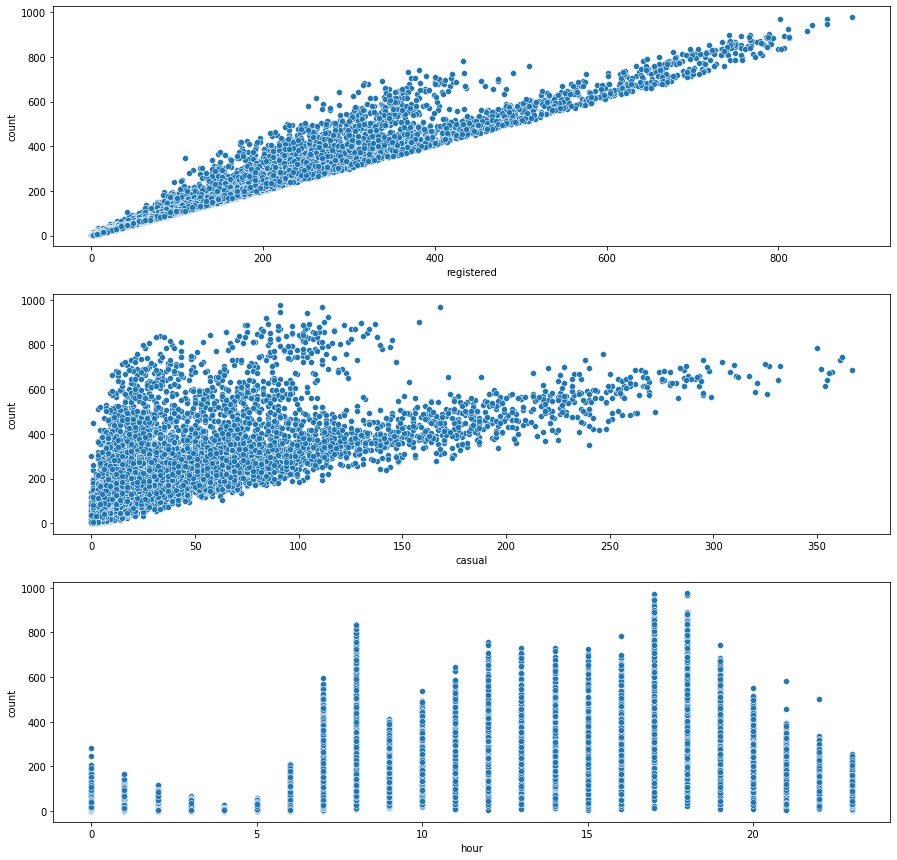

In [ ]:
plt.figure(figsize = (15, 15))
plt.subplot(3, 1, 1)
sns.scatterplot(x = DF_3['registered'],
                y = DF_3['count'],
                data = DF_3,)

plt.subplot(3, 1, 2)
sns.scatterplot(x = DF_3['casual'],
                y = DF_3['count'],
                data = DF_3)

plt.subplot(3, 1, 3)
sns.scatterplot(x = DF_3['hour'],
                y = DF_3['count'],
                data = DF_3)

추출한 col 변수 간의 상관관계

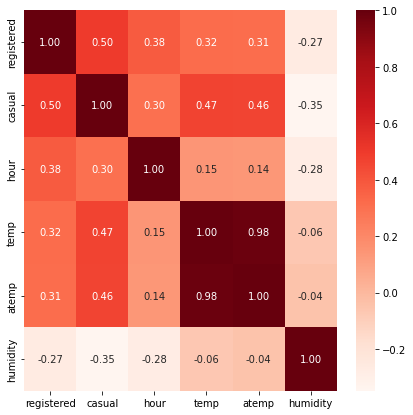

In [ ]:
plt.figure(figsize = (7, 7))
sns.heatmap(DF_3.loc[:,'registered':].corr(),
            annot = True,
            cmap = 'Reds',
            fmt = '.2f')
plt.show()

# IV. Modeling - Multivariate Regression

> ## 1) 변수 선택 

In [ ]:
DF5 = DF[['count','registered','casual','hour','temp','atemp']]
DF5.head()

,count,registered,casual,hour,temp,atemp
0,16,13,3,0,9.84,14.395
1,40,32,8,1,9.02,13.635
2,32,27,5,2,9.02,13.635
3,13,10,3,3,9.84,14.395
4,1,1,0,4,9.84,14.395


> ## 2) train_test_split( )

* 7 : 3
 - random_state = 2045

In [ ]:
from sklearn.model_selection import train_test_split

X = DF5.iloc[:, : -1]
y = DF5.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state=2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data  : ', X_test.shape, y_test.shape)

Train Data :  (7620, 5) (7620,)
Test Data  :  (3266, 5) (3266,)


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(DF,
                                       test_size = 0.3,
                                       random_state = 2045)

train_set.shape, test_set.shape

((7620, 16), (3266, 16))

> ## 3) 모델 생성

> ## 4) 모델 평가

In [ ]:
from sklearn.linear_model import LinearRegression

KBSD = LinearRegression()
KBSD.fit(X_train, y_train)

LinearRegression()

# MSE

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, KBSD.predict(X_test))

2.883102720932106

# RMSE

In [ ]:
mean_squared_error(y_test, KBSD.predict(X_test), squared=False)

1.6979701766910118

# R-Squared

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, KBSD.predict(X_test))

0.9592064949820077

#predict()

In [ ]:
y_hat = KBSD.predict(X_test)
y_hat

array([23.91108232, 14.24739741, 16.92324103, ...,  6.37046187,
       24.84490734, 16.8965868 ])

# 회귀계수

In [101]:
KBSD.coef_

array([ 2.83483086e-04, -1.25528410e-04,  4.09011496e-04, -5.72964555e-03,
        1.07212575e+00])

# OLS로 예측값 확인


In [ ]:
DF.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'count ~ registered + casual + hour + temp + atemp',
                  data = train_set).fit()

Model_2 = smf.ols(formula = 'count ~ registered + casual + hour',
                  data = train_set).fit()



In [ ]:
y_hat_1 = Model_1.predict(test_set[['registered','casual','hour','temp','atemp']])
y_hat_2 = Model_2.predict(test_set[['registered','casual','hour']])

method

In [104]:
print('MSE1 : ',mean_squared_error(test_set['count'], y_hat_1))
print('MSE2 : ', mean_squared_error(test_set['count'], y_hat_2))

MSE1 :  7.293352301889937e-25
MSE2 :  1.3277316435228833e-25


이미지화

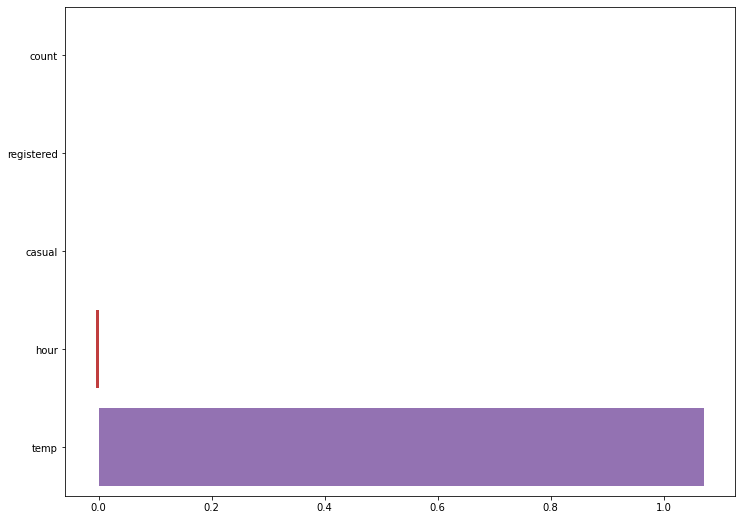

In [105]:
plt.figure( figsize = (12, 9))
sns.barplot(x = KBSD.coef_,
            y = X_train.columns)
plt.show()

# 
# 
# 
# The End
# 
# 
# 